# Clustering Jerárquico

En este cuaderno, utilizaremos sklearn para hacer clustering jerárquico en el dataset Iris. Iris contiene 4 atributos y 150 samples. Cada uno tiene sus labels como uno de los tres tipos de flores Iris. En este ejercicio corto, quitaremos los labels y vamos a crear los clusters basándonos en los atributos. Luego compararemos los resultados de diferentes técnicas con los labels originales para ver cuáles lo hacen mejor.

## 1. Importando dataset Iris

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

Estos son los primeros 10 ejemplos con sus features y sus respectivos labels.

In [4]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Clustering
Iniciaremos usando el método `AgglomerativeClustering` para conducir clustering jerárquico. 

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

Vamos a usar complete y average linkage.

In [7]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

Vamos a comparar los resultados con los labels originales. Usaremo `adjusted_rand_score`, que es un índice de validación externo con valores entre -1 y 1, donde 1 significa que dos clusters son idénticos en cómo agruparon los samples, sin importar el label que se asignó.

In [8]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

In [9]:
# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

In [10]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.731198556771 
Complete:  0.642251251836 
Average:  0.759198707107


## 3. Efecto de normalización

Vamos a mejorar el resultado.

In [11]:
iris.data[:15]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2]])

Mirando esto, podemos ver que la cuarta columna tiene valores más bajos que las otras columnas, por lo que su varianza contará menos en el proceso de clustering dado que se basa en distancia. Vamos a normalizar el dataset para que sus valores estén entre 0 y 1. Vamos a usar la función `preprocessing.normalize()`.

In [12]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[ 0.80377277,  0.55160877,  0.22064351,  0.0315205 ],
       [ 0.82813287,  0.50702013,  0.23660939,  0.03380134],
       [ 0.80533308,  0.54831188,  0.2227517 ,  0.03426949],
       [ 0.80003025,  0.53915082,  0.26087943,  0.03478392],
       [ 0.790965  ,  0.5694948 ,  0.2214702 ,  0.0316386 ],
       [ 0.78417499,  0.5663486 ,  0.2468699 ,  0.05808704],
       [ 0.78010936,  0.57660257,  0.23742459,  0.0508767 ],
       [ 0.80218492,  0.54548574,  0.24065548,  0.0320874 ],
       [ 0.80642366,  0.5315065 ,  0.25658935,  0.03665562],
       [ 0.81803119,  0.51752994,  0.25041771,  0.01669451]])

In [13]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)


ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.885697031028 
Complete:  0.644447235392 
Average:  0.558371443754


## 4. Visualización de dendograma

Vamos a usar Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) para realizar el clustering y obtener la matriz de linkage.

In [14]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(normalized_X, linkage_type)

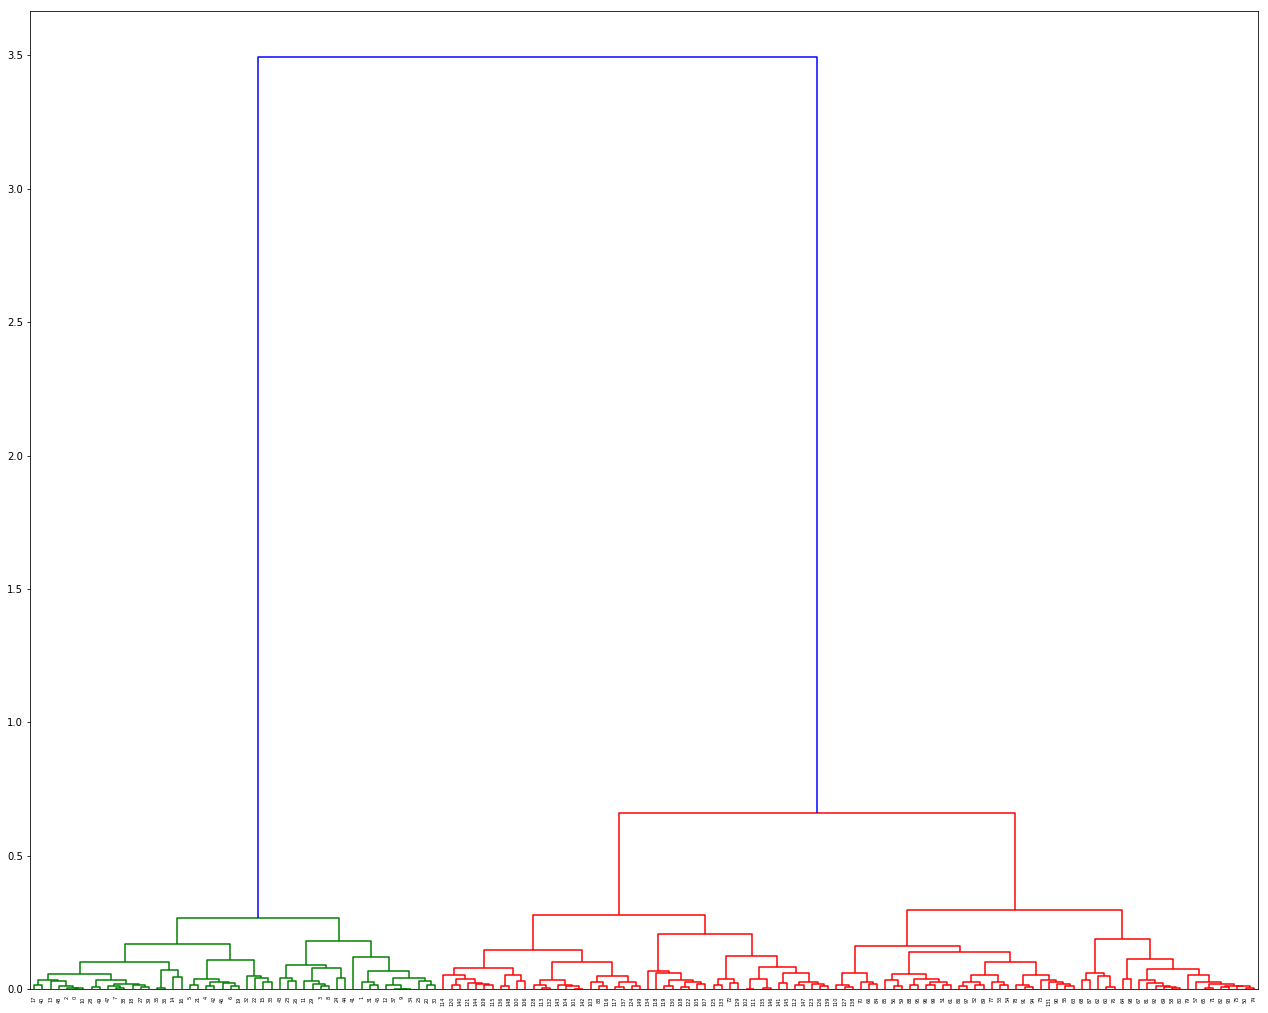

In [16]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()